# Dot Density Plots

In [1]:
import geopandas as gpd
import mapped
mapped.__version__, gpd.__version__

('19.12.1', '0.6.2')

In [2]:
gdf = gpd.read_file(gpd.datasets.get_path('nybb'))

gdf['Population'] = [
    479_458, 
    2_358_582,
    2_648_771,
    1_664_727,
    1_471_160,
]

gdf

,BoroCode,BoroName,Shape_Leng,Shape_Area,geometry,Population
0,5,Staten Island,330470.010332,1.623820e+09,"MULTIPOLYGON (((970217.022 145643.332, 970227....",479458
1,4,Queens,896344.047763,3.045213e+09,"MULTIPOLYGON (((1029606.077 156073.814, 102957...",2358582
2,3,Brooklyn,741080.523166,1.937479e+09,"MULTIPOLYGON (((1021176.479 151374.797, 102100...",2648771
3,1,Manhattan,359299.096471,6.364715e+08,"MULTIPOLYGON (((981219.056 188655.316, 980940....",1664727
4,2,Bronx,464392.991824,1.186925e+09,"MULTIPOLYGON (((1012821.806 229228.265, 101278...",1471160


The `dotdensity` method is patched into the `GeoDataFrame` class.  It lets you
generate a new GeoSeries of points in each polygon in proportion to some
attribute in the original GeoDataFrame.

In [3]:
dots = gdf.dotdensity('Population', units_per_point=1e4)

In [4]:
dots.head()

0  0    POINT (918444.793 122684.940)
   1    POINT (946389.317 169427.663)
   2    POINT (951486.097 172255.074)
   3    POINT (929640.480 147704.559)
   4    POINT (929587.612 150638.626)
Name: geometry, dtype: geometry

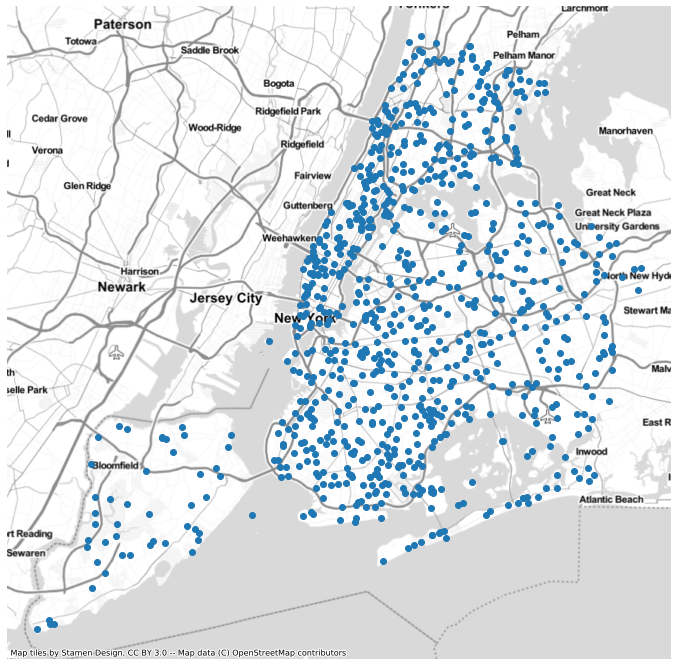

In [5]:
dots.plot(basemap="Stamen.TonerLite", figsize=(12,12));